In [4]:
import pandas as pd
import numpy as np

In [5]:
df= pd.read_csv("df_total_escolarizado.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'faixa_remuneracao_media_sm', 'sexo_cod',
       'estudantil_Doutorado', 'estudantil_Fundamental Completo',
       'estudantil_Mestrado', 'estudantil_Médio Completo',
       'estudantil_Médio Incompleto', 'estudantil_Superior Completo',
       'estudantil_Superior Incompleto', 'f', 'm'],
      dtype='object')

In [3]:
df.shape

(16358382, 12)

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("f", axis=1, inplace=True)
df.drop("m", axis=1, inplace=True)
df.head()

faixa_remuneracao_media_sm  sexo_cod  estudantil_Doutorado  \
0                           0         0                     0   
1                           0         0                     0   
2                           0         0                     0   
3                           0         0                     0   
4                           0         0                     0   

   estudantil_Fundamental Completo  estudantil_Mestrado  \
0                                1                    0   
1                                1                    0   
2                                1                    0   
3                                1                    0   
4                                1                    0   

   estudantil_Médio Completo  estudantil_Médio Incompleto  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   estudantil_Superior Completo  estudantil_Superior Incompleto  
0                             0                               0  
1                             0                               0  
2                             0                               0  
3                             0                               0  
4                             0                               0

In [8]:
df_menor = df[df["faixa_remuneracao_media_sm"]==0]

df_0 = df[df["faixa_remuneracao_media_sm"].isin([1, 2, 3])]
df_1 = df[df["faixa_remuneracao_media_sm"].isin([8, 9, 10])]

df_maior = df[df["faixa_remuneracao_media_sm"]==11]


In [9]:
df_logistica =  df[df["faixa_remuneracao_media_sm"].isin([0,11])]
df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_23681/1279625075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


In [8]:
df_logistica.columns

Index(['faixa_remuneracao_media_sm', 'sexo_cod', 'estudantil_Doutorado',
       'estudantil_Fundamental Completo', 'estudantil_Mestrado',
       'estudantil_Médio Completo', 'estudantil_Médio Incompleto',
       'estudantil_Superior Completo', 'estudantil_Superior Incompleto'],
      dtype='object')

In [9]:
import statsmodels.api as sm

X = df_logistica[['sexo_cod', 'estudantil_Doutorado',
       'estudantil_Fundamental Completo', 'estudantil_Mestrado',
       'estudantil_Médio Completo', 'estudantil_Médio Incompleto',
       'estudantil_Superior Completo', 'estudantil_Superior Incompleto']] 
X = sm.add_constant(X)  
# Variável dependente
y = df_logistica['faixa_remuneracao_media_sm']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.222552
         Iterations 9
                               Logit Regression Results                               
Dep. Variable:     faixa_remuneracao_media_sm   No. Observations:               471892
Model:                                  Logit   Df Residuals:                   471883
Method:                                   MLE   Df Model:                            8
Date:                        Thu, 09 May 2024   Pseudo R-squ.:                  0.5038
Time:                                21:55:04   Log-Likelihood:            -1.0502e+05
converged:                               True   LL-Null:                   -2.1164e+05
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
co

Coeficientes (coef)
Os coeficientes representam a mudança logarítmica na razão de chances (log-odds) de um resultado (neste caso, estar na faixa 1 vs. 0) para cada aumento de uma unidade na variável preditora, mantendo todas as outras variáveis constantes.

sexo_cod: 1.2498 - Este valor indica que o aumento de uma unidade em sexo_cod (supondo que codifique de 0 para 1, como de masculino para feminino, por exemplo) está associado a um aumento na log-odds de estar na faixa 1 em aproximadamente 1.2498. Isso é um efeito significativo, dado que o valor é bastante distante de zero e tem um p-value muito pequeno.
P-values
Os p-values ajudam a determinar se os resultados são estatisticamente significativos. Um p-value menor que 0.05 geralmente indica que há uma diferença estatisticamente significativa da hipótese nula (de que o coeficiente é igual a zero, ou seja, que a variável não tem efeito).

sexo_cod: p < 0.000 - Isso mostra que a variável sexo_cod é estatisticamente significativa, rejeitando a hipótese nula de que não tem efeito sobre a probabilidade de estar na faixa salarial 1.
Intervalos de Confiança [0.025, 0.975]
Os intervalos de confiança fornecem uma faixa dentro da qual o verdadeiro valor do coeficiente é esperado estar com 95% de confiança. No caso de sexo_cod, o intervalo não inclui o zero, reforçando que o efeito é estatisticamente significativo.

Odds Ratio
Para uma interpretação mais intuitiva, você pode calcular a razão de chances (odds ratio) para cada variável, que é o exponencial dos coeficientes do modelo:

Odds Ratio de sexo_cod: exp(1.2498) ≈ 3.49. Isso significa que, mantendo todas as outras variáveis constantes, a mudança de sexo_cod de 0 para 1 aumenta as chances de estar na faixa salarial 1 em cerca de 3.49 vezes.
Interpretação Geral
Com base nos resultados, sexo_cod é uma variável preditora significativa para estar na faixa salarial 1 versus 0. O modelo também tem um Pseudo R-quadrado de 0.5038, indicando que ele explica aproximadamente 50.38% da variabilidade na resposta, o que é bastante substancial para um modelo logístico.

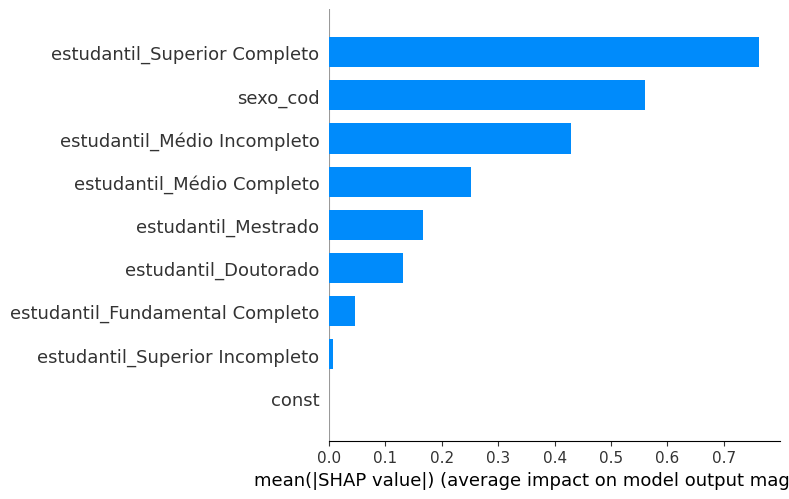

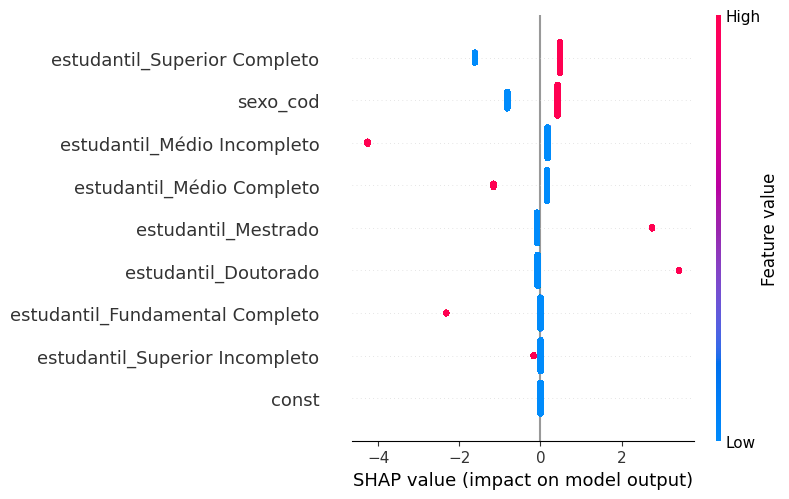

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap
explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [5]:
import shap
shap.summary_plot(shap_values, X_test)

NameError: name 'shap_values' is not defined

Interpretação dos Gráficos SHAP para Regressão Logística
Os gráficos SHAP (SHapley Additive exPlanations) são uma ferramenta poderosa para interpretar os modelos de machine learning. Eles ajudam a entender o impacto de cada variável na previsão do modelo. Vamos interpretar os gráficos gerados para sua regressão logística.

Gráfico de Barras SHAP (Summary Plot - Bar)

Este gráfico mostra a média do valor absoluto das contribuições SHAP para cada variável. Ele indica a importância de cada característica na previsão do modelo.

estudantil_Superior Completo:

Tem o maior impacto no modelo, indicando que a conclusão do ensino superior é a variável mais importante para a previsão da variável alvo.
sexo_cod:

A segunda variável mais importante, sugerindo que o sexo também tem um impacto significativo nas previsões.
estudantil_Médio Incompleto e estudantil_Médio Completo:

Essas variáveis também são importantes, indicando que o nível de conclusão do ensino médio afeta as previsões.
Outras variáveis de escolaridade (Mestrado, Doutorado, Fundamental Completo, Superior Incompleto):

Têm impacto menor em comparação com as primeiras, mas ainda assim contribuem para o modelo.
Gráfico de Dispersão SHAP (Summary Plot - Dot)

Este gráfico mostra o valor SHAP de cada ponto de dados para cada característica. A cor representa o valor da característica (azul para baixo e vermelho para alto).

estudantil_Superior Completo:

Valores SHAP positivos (à direita) indicam que a conclusão do ensino superior aumenta a previsão do modelo (provavelmente está associada a uma maior probabilidade da classe positiva).
Valores SHAP negativos (à esquerda) indicam que a falta dessa característica diminui a previsão do modelo.
sexo_cod:

Mostra como diferentes valores de sexo_cod afetam a previsão. Por exemplo, um sexo_cod específico (vermelho) pode aumentar a previsão do modelo, enquanto outro valor (azul) pode diminuí-la.
estudantil_Médio Incompleto e estudantil_Médio Completo:

O padrão é semelhante ao do ensino superior, mas com menor magnitude.
Outras variáveis de escolaridade:

Contribuem menos para as previsões, mas ainda são relevantes. As cores indicam que valores altos dessas características (vermelho) podem ter diferentes efeitos nas previsões.
Conclusão
Os gráficos SHAP indicam que as variáveis de escolaridade têm um impacto significativo nas previsões do modelo de regressão logística, com a conclusão do ensino superior sendo a mais influente. O sexo também é uma variável importante. A análise desses gráficos pode ajudar a entender como cada característica contribui para as previsões e pode orientar ações específicas para melhorar o modelo ou tomar decisões baseadas nos insights obtidos.

Agora vou rodar a logistica deixando como variavel y o sexo cod e colocando todas as outras como dependentes para ver qual explica melhor

In [10]:
import statsmodels.api as sm

X = df_logistica[['faixa_remuneracao_media_sm', 'estudantil_Doutorado',
       'estudantil_Fundamental Completo', 'estudantil_Mestrado',
       'estudantil_Médio Completo', 'estudantil_Médio Incompleto',
       'estudantil_Superior Completo', 'estudantil_Superior Incompleto']] 
X = sm.add_constant(X)  
# Variável dependente
y = df_logistica['sexo_cod']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.631036
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               sexo_cod   No. Observations:               471892
Model:                          Logit   Df Residuals:                   471883
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 May 2024   Pseudo R-squ.:                 0.02594
Time:                        22:01:03   Log-Likelihood:            -2.9778e+05
converged:                       True   LL-Null:                   -3.0571e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2611   2.87e+04   -9.1e-06  

LinearExplainer explainer: 4907516it [00:28, 98799.66it/s]                              


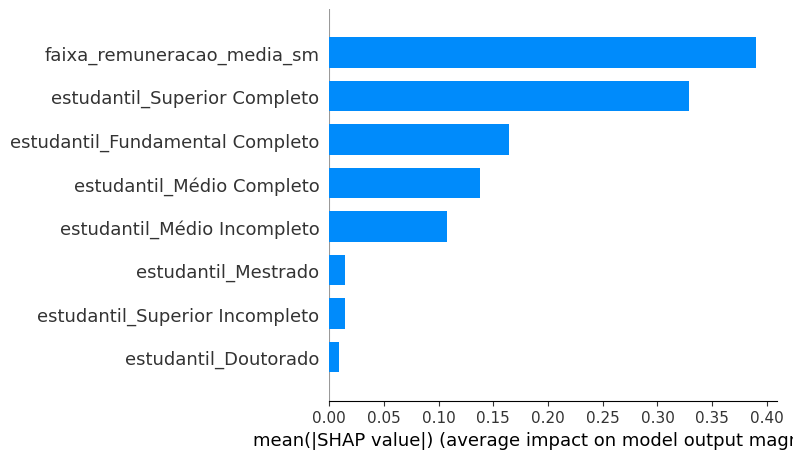

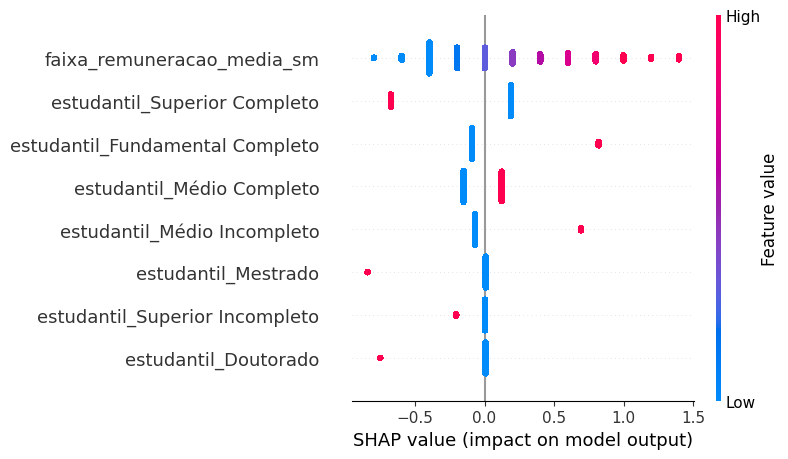

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['faixa_remuneracao_media_sm', 'estudantil_Doutorado',
       'estudantil_Fundamental Completo', 'estudantil_Mestrado',
       'estudantil_Médio Completo', 'estudantil_Médio Incompleto',
       'estudantil_Superior Completo', 'estudantil_Superior Incompleto']]  

y= df['sexo_cod']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
